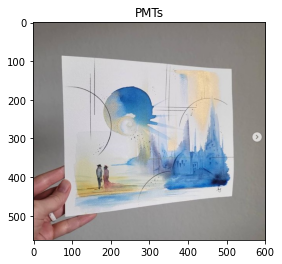

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from cv2 import imread as imread

#bgr = cv2.imread('./../Test_Images/shape4.jpg')  #read shape4 image from system
bgr = cv2.imread('./../Test_Images/Watercolor_Practice.jpg')  #read watercolor image from system
im = cv2.imread('./../Test_Images/Watercolor_Practice.jpg', 1)

b,g,r = cv2.split(bgr)
img = cv2.merge([r,g,b])
    
# Display image using matplotlib:

#Creates plot of original image, resized for visibility here.

plt.imshow(img)
plt.title('PMTs')
plt.show()


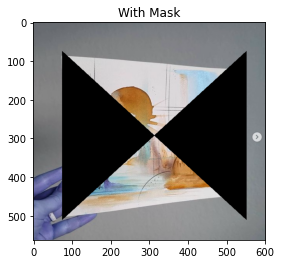

In [2]:
#create mask
# create a polygons using all outer corners of the ROI
external_poly = np.array( [[[75,75],[75,510],[550,75],[550,510]]], dtype=np.int32 )

cv2.fillPoly(im, external_poly, (0,0,0) )
#cv2.imwrite("output.jpg", im) 
plt.imshow(im)
plt.title('With Mask')
plt.show()

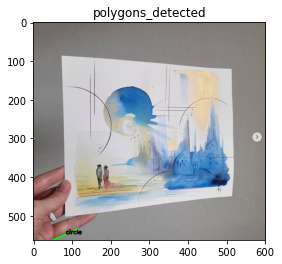

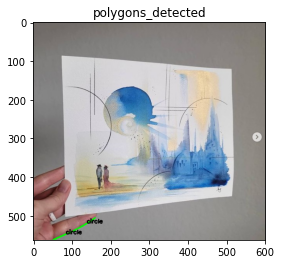

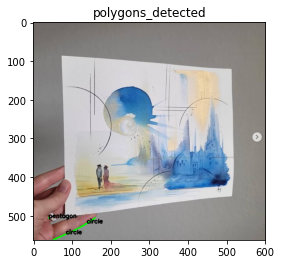

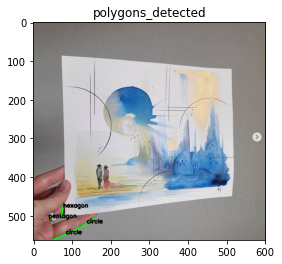

ZeroDivisionError: float division by zero

In [3]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  #Convert to grayscale image
edged = cv2.Canny(gray, 170, 255)            #Determine edges of objects in an image

ret,thresh = cv2.threshold(gray,240,255,cv2.THRESH_BINARY)

(contours,_) = cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #Find contours in an image
def detectShape(c):          #Function to determine type of polygon on basis of number of sides
       shape = 'unknown'
       peri=cv2.arcLength(cnt,True)
       vertices = cv2.approxPolyDP(cnt, 0.02 * peri, True)
       sides = len(vertices)
       if (sides == 3):
            shape='triangle'
       elif(sides==4):
             x,y,w,h=cv2.boundingRect(cnt)
             aspectratio=float(w)/h
             if (aspectratio==1):
                   shape='square'
             else:
                   shape="rectangle"
       elif(sides==5):
            shape='pentagon'
       elif(sides==6):
            shape='hexagon'
       elif(sides==8):
            shape='octagon'
       elif(sides==10):
            shape='star'
       else:
           shape='circle'
       return shape
for cnt in contours:
    moment=cv2.moments(cnt)
    cx = int(moment['m10'] / moment['m00'])
    cy = int(moment['m01'] / moment['m00'])
    shape=detectShape(cnt)
    cv2.drawContours(img,[cnt],-1,(0,255,0),2)
    cv2.putText(img,shape,(cx,cy),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),2)  #Putting name of polygon along with the shape
    plt.imshow(img)
    plt.title('polygons_detected')
    plt.show()